# Ensemble learning (classification)

In [1]:
%load_ext autoreload
%autoreload 2

!python --version

Python 3.7.6


In [2]:
import sys
sys.path.append('..')

In [3]:
from sklearn.model_selection import cross_val_score

from src.dataset import DatasetForClassification

from src.evaluation import custom_classification_report

## Load the dataset

In [4]:
dataset = DatasetForClassification('../data/fifa_processed_for_cls.csv', ['Position (4)', 'Position (13)'])

# Classification of "Position (4)"

In [5]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (4)')

In [6]:
labels = dataset.get_labels('Position (4)')

## Adaboost classifier

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights w1, w2, w3, ... wN
 to each of the training samples. Initially, those weights are all set to 
wi = 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence [HTF].

We used random forest classifier since we identified it as the best one.

attack
precision: 0.7838235294117647
recall: 0.8596774193548387
f1-score: 0.82
support: 620


defense
precision: 0.9438202247191011
recall: 0.9215189873417722
f1-score: 0.9325362937660119
support: 1185


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8722943722943723
recall: 0.8526093088857546
f1-score: 0.8623395149786022
support: 1418


accuracy: 0.8928374655647383


macro avg
precision: 0.8999845316063095
recall: 0.9084514288955914
f1-score: 0.9037189521861535
support: 3630


weighted avg
precision: 0.8948515081104267
recall: 0.8928374655647383
f1-score: 0.8934581102899124
support: 3630


F1
micro: 0.8928374655647383
macro: 0.9037189521861535


CPU times: user 3.53 s, sys: 0 ns, total: 3.53 s
Wall time: 3.55 s


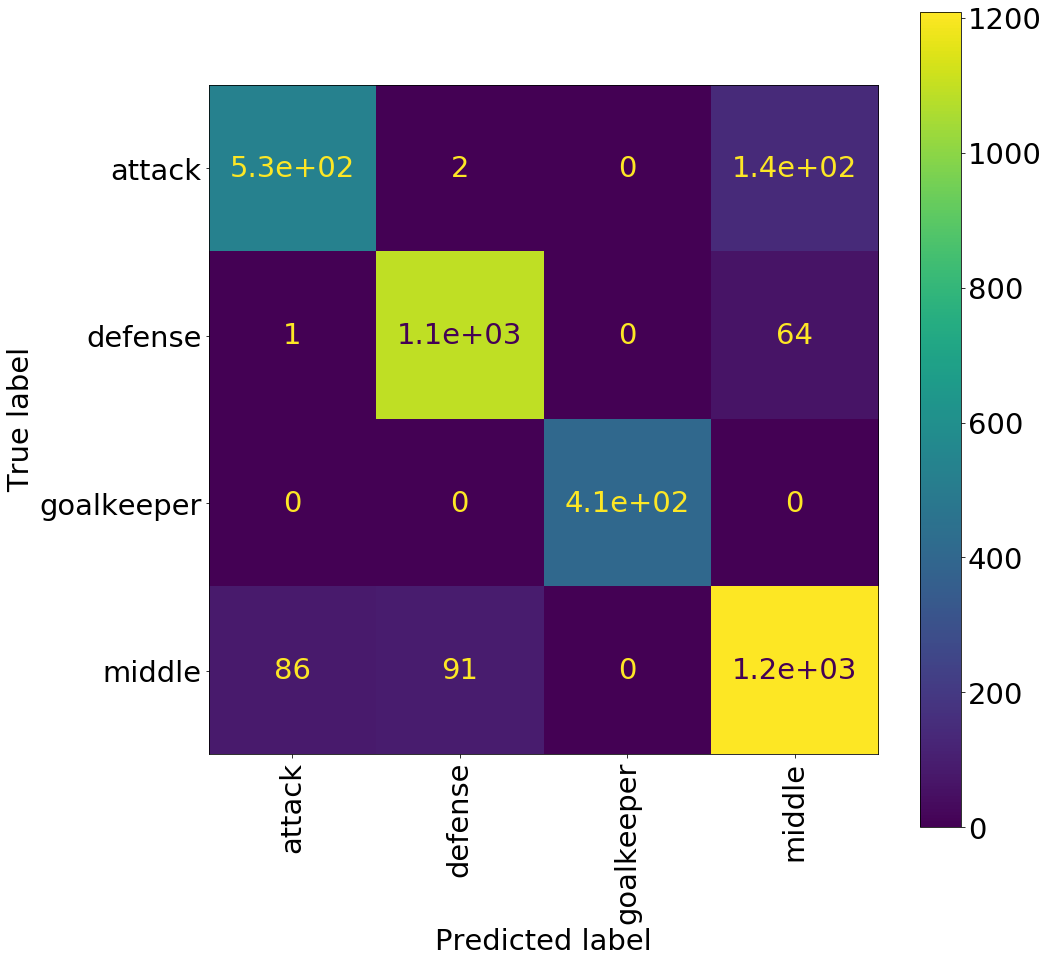

In [10]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=RandomForestClassifier(random_state=42), random_state=42)

clf.fit(X_train, y_train)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Gradient tree boosting

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

In [29]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

for n_esitmators in [10, 20, 50, 100, 200, 250, 500, 1000]:
    print(f'\n\nn_esitmators = {n_esitmators}\n')
    
    clf = GradientBoostingClassifier(n_estimators=n_esitmators)

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    for average in ['micro', 'macro']:
        print(f'{average}: {f1_score(y_test, y_pred, average=average)}')



n_esitmators = 10

micro: 0.8402203856749312
macro: 0.8612049444222825


n_esitmators = 20

micro: 0.8713498622589532
macro: 0.8874438003099796


n_esitmators = 50

micro: 0.8895316804407714
macro: 0.900720102598797


n_esitmators = 100

micro: 0.89366391184573
macro: 0.904391939899545


n_esitmators = 200

micro: 0.8917355371900828
macro: 0.9026187583430428


n_esitmators = 250

micro: 0.8922865013774105
macro: 0.903169060498809


n_esitmators = 500

micro: 0.8887052341597796
macro: 0.8997309010912317


n_esitmators = 1000

micro: 0.8884297520661157
macro: 0.8995254832184797
CPU times: user 8min 50s, sys: 1.34 s, total: 8min 51s
Wall time: 8min 52s


attack
precision: 0.7955882352941176
recall: 0.8426791277258567
f1-score: 0.8184568835098335
support: 642


defense
precision: 0.9369057908383751
recall: 0.9320722269991402
f1-score: 0.9344827586206897
support: 1163


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.873015873015873
recall: 0.8533145275035261
f1-score: 0.8630527817403709
support: 1418


accuracy: 0.8931129476584022


macro avg
precision: 0.9013774747870914
recall: 0.9070164705571309
f1-score: 0.9039981059677236
support: 3630


weighted avg
precision: 0.8940290880827442
recall: 0.8931129476584022
f1-score: 0.8934054027540004
support: 3630


F1
micro: 0.8931129476584022
macro: 0.9039981059677236


CPU times: user 25.9 s, sys: 24.6 ms, total: 25.9 s
Wall time: 25.9 s


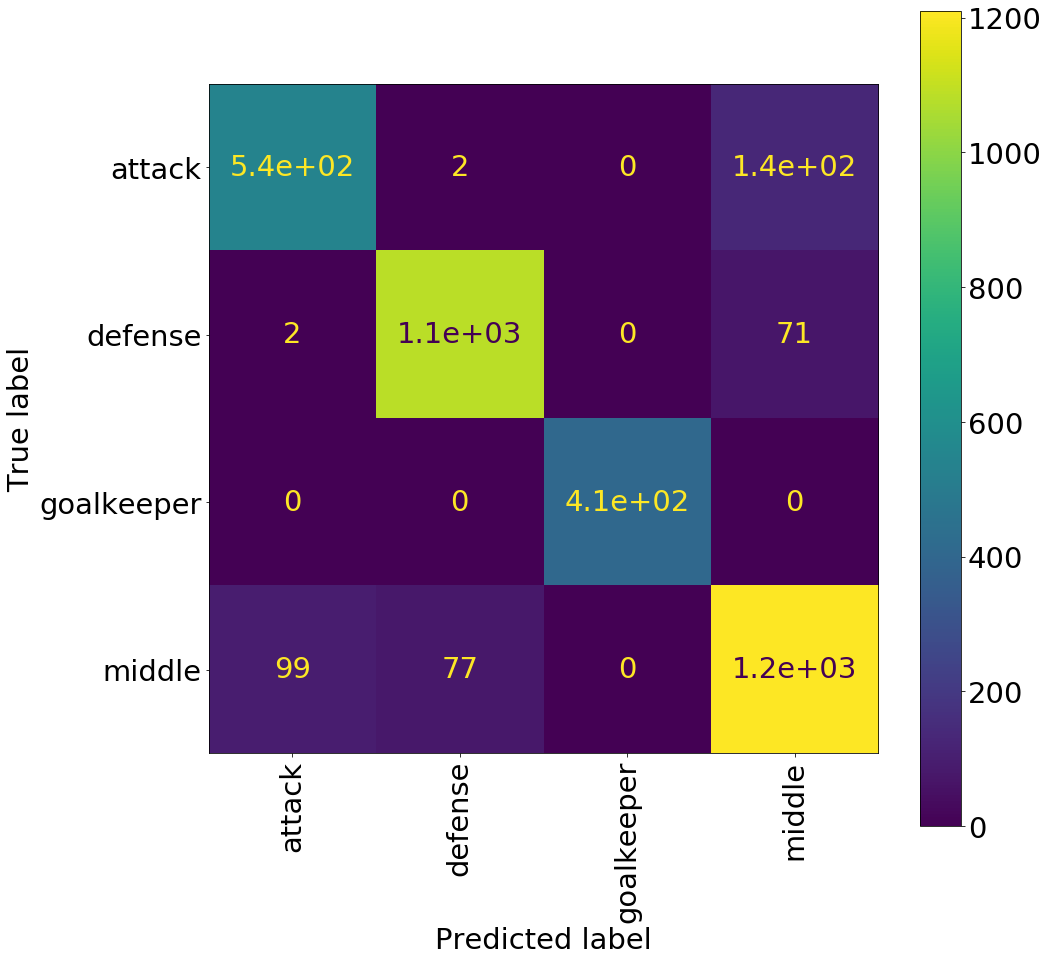

In [11]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100)

clf.fit(X_train, y_train)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Voting classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

### Hard voting

In majority(hard) voting, the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.

We used three best classifier indentified in __05_model_selection_classification.ipynb__.

In [8]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


attack
precision: 0.7735294117647059
recall: 0.8566775244299675
f1-score: 0.812982998454405
support: 614


defense
precision: 0.9273984442523768
recall: 0.9445422535211268
f1-score: 0.9358918447448757
support: 1136


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8939393939393939
recall: 0.8411405295315683
f1-score: 0.8667366211962224
support: 1473


accuracy: 0.8939393939393939


macro avg
precision: 0.8987168124891192
recall: 0.9105900768706656
f1-score: 0.9039028660988758
support: 3630


weighted avg
precision: 0.8959351015886934
recall: 0.8939393939393939
f1-score: 0.8942280274664516
support: 3630


F1
micro: 0.8939393939393939
macro: 0.9039028660988758


CPU times: user 7min 43s, sys: 1.35 s, total: 7min 44s
Wall time: 8min 5s


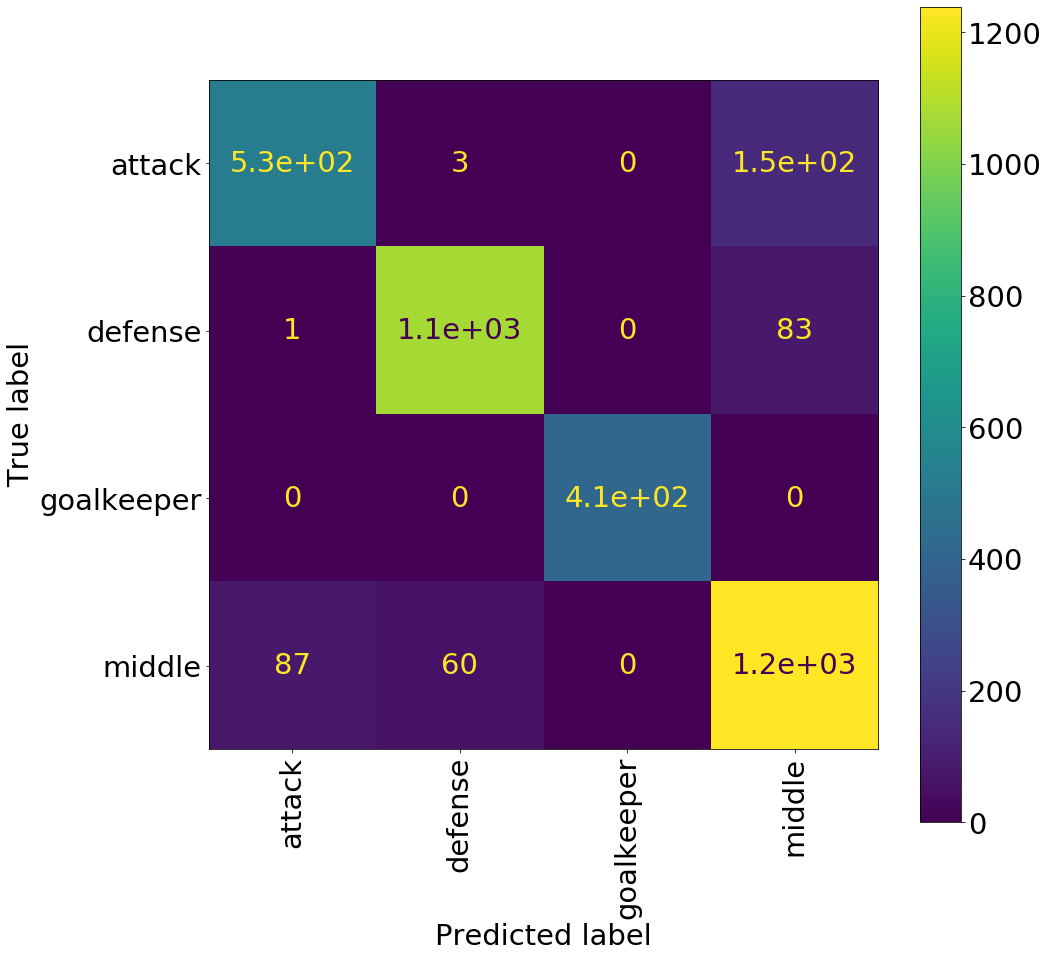

In [20]:
%%time

clf1 = LogisticRegression(random_state=42, max_iter=10000, n_jobs=-1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = LinearSVC(random_state=42, max_iter=100000)

eclf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('ls', clf3)
], voting='hard')

eclf.fit(X_train, y_train)

custom_classification_report(eclf, labels, X_test, y_test, figsize=(15, 15))

### Soft voting

In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.

Specific weights can be assigned to each classifier via the weights parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.

We used three best classifier indentified in __05_model_selection_classification.ipynb__.

attack
precision: 0.8058823529411765
recall: 0.8417818740399385
f1-score: 0.8234410217881293
support: 651


defense
precision: 0.9386343993085566
recall: 0.9402597402597402
f1-score: 0.939446366782007
support: 1155


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8773448773448773
recall: 0.858151023288638
f1-score: 0.8676418123439172
support: 1417


accuracy: 0.8972451790633609


macro avg
precision: 0.9054654073986526
recall: 0.9100481593970792
f1-score: 0.9076323002285134
support: 3630


weighted avg
precision: 0.8977823234610964
recall: 0.8972451790633609
f1-score: 0.8974019578260662
support: 3630


F1
micro: 0.8972451790633609
macro: 0.9076323002285134


CPU times: user 15min 24s, sys: 4.11 s, total: 15min 28s
Wall time: 16min 51s


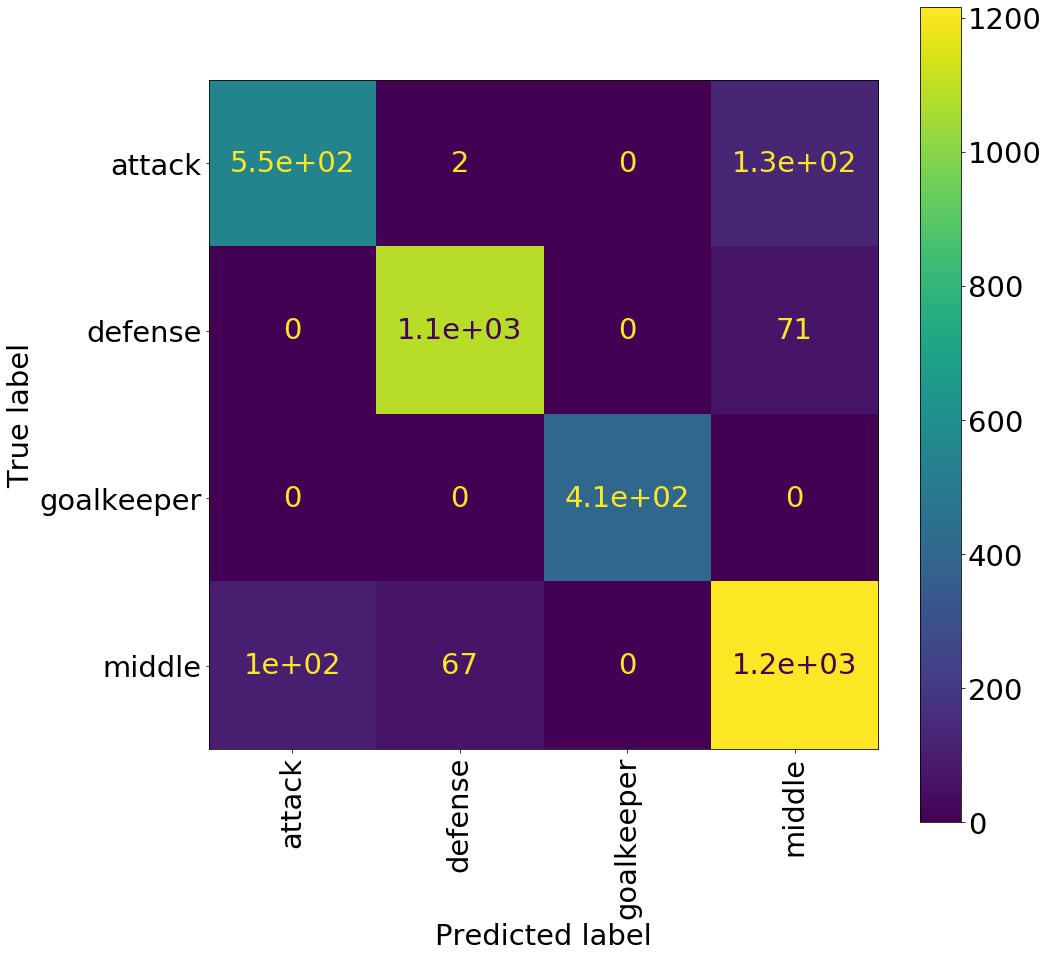

In [11]:
%%time

from sklearn.svm import SVC


clf1 = LogisticRegression(random_state=42, max_iter=10000, n_jobs=-1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = SVC(kernel='linear', probability=True)

eclf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('ls', clf3)
], voting='soft', weights=[2, 2, 1])

eclf.fit(X_train, y_train)

custom_classification_report(eclf, labels, X_test, y_test, figsize=(15, 15))

## Stacked generalization

Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

attack
precision: 0.8029411764705883
recall: 0.8544600938967136
f1-score: 0.8278999241849886
support: 639


defense
precision: 0.9455488331892826
recall: 0.9318568994889267
f1-score: 0.9386529386529386
support: 1174


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


middle
precision: 0.8773448773448773
recall: 0.8624113475177305
f1-score: 0.8698140200286123
support: 1410


accuracy: 0.8988980716253444


macro avg
precision: 0.906458721751187
recall: 0.9121820852258427
f1-score: 0.9090917207166349
support: 3630


weighted avg
precision: 0.9000578564697523
recall: 0.8988980716253444
f1-score: 0.8992959696344631
support: 3630


F1
micro: 0.8988980716253444
macro: 0.9090917207166349


CPU times: user 2min 53s, sys: 509 ms, total: 2min 53s
Wall time: 2min 55s


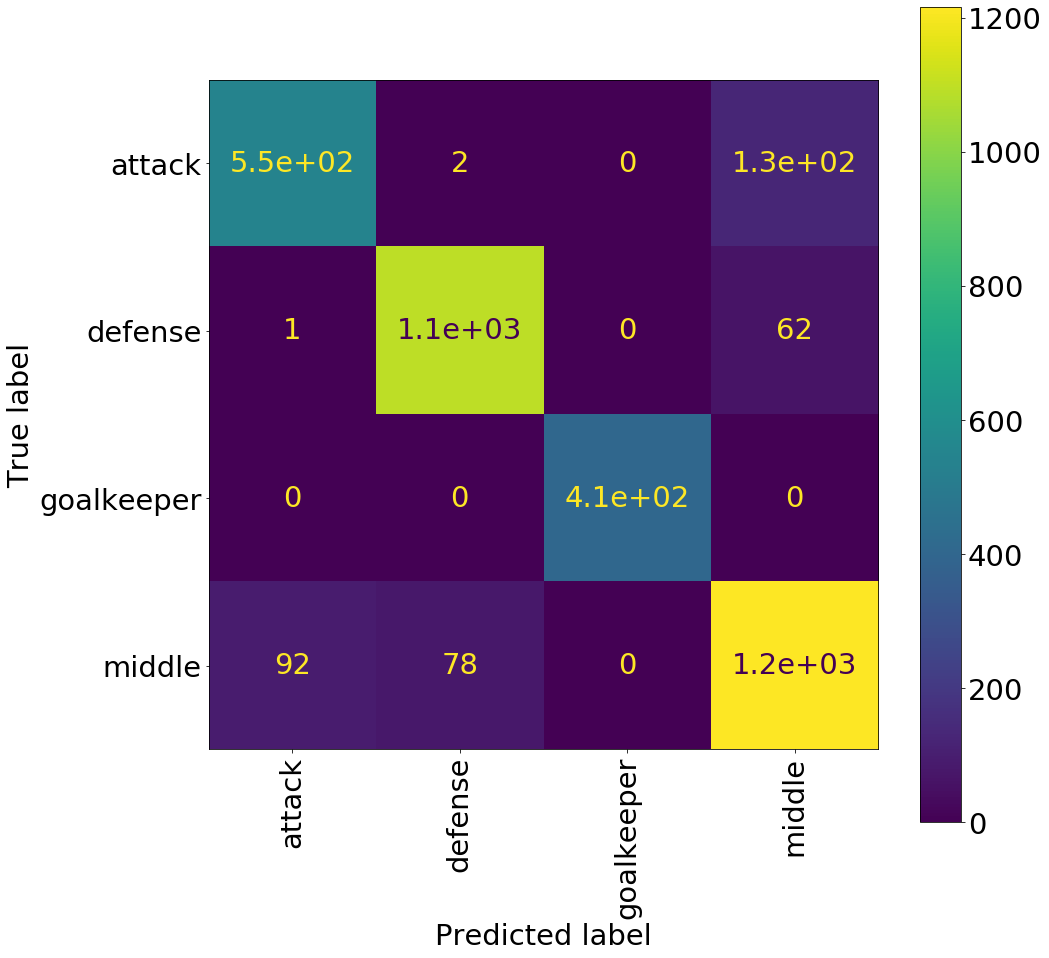

In [10]:
%%time

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_ada = AdaBoostClassifier(n_estimators=100, base_estimator=RandomForestClassifier(random_state=42), random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=100)

estimators = [
    ('rf', clf_rf),
    ('gb', clf_gb),
    ('ada', clf_ada)
]

clf = StackingClassifier(estimators=estimators, cv=5, n_job=-1, final_estimator=LogisticRegression(max_iter=10000, n_jobs=-1))

clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

# Classification of Position(13)

In [33]:
X_train, X_test, y_train, y_test = dataset.get_data('Position (13)')
labels = dataset.get_labels('Position (13)')

## Adaboost classifier

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


attacking midfielder
precision: 0.4444444444444444
recall: 0.44692737430167595
f1-score: 0.4456824512534819
support: 179


central attack
precision: 0.9387755102040817
recall: 0.6831683168316832
f1-score: 0.7908309455587392
support: 606


central defense
precision: 0.8015267175572519
recall: 0.6976744186046512
f1-score: 0.7460035523978685
support: 301


deffensive midfielder
precision: 0.4909090909090909
recall: 0.574468085106383
f1-score: 0.5294117647058822
support: 235


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.008547008547008548
recall: 0.0625
f1-score: 0.015037593984962409
support: 16


left defense
precision: 0.8125
recall: 0.7809187279151943
f1-score: 0.7963963963963964
support: 283


left midfielder
precision: 0.2597402597402597
recall: 0.3409090909090909
f1-score: 0.2948402948402948
support: 176


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


midfielder
precision: 0.7288503253796096
recall: 0.5813148788927336
f1-

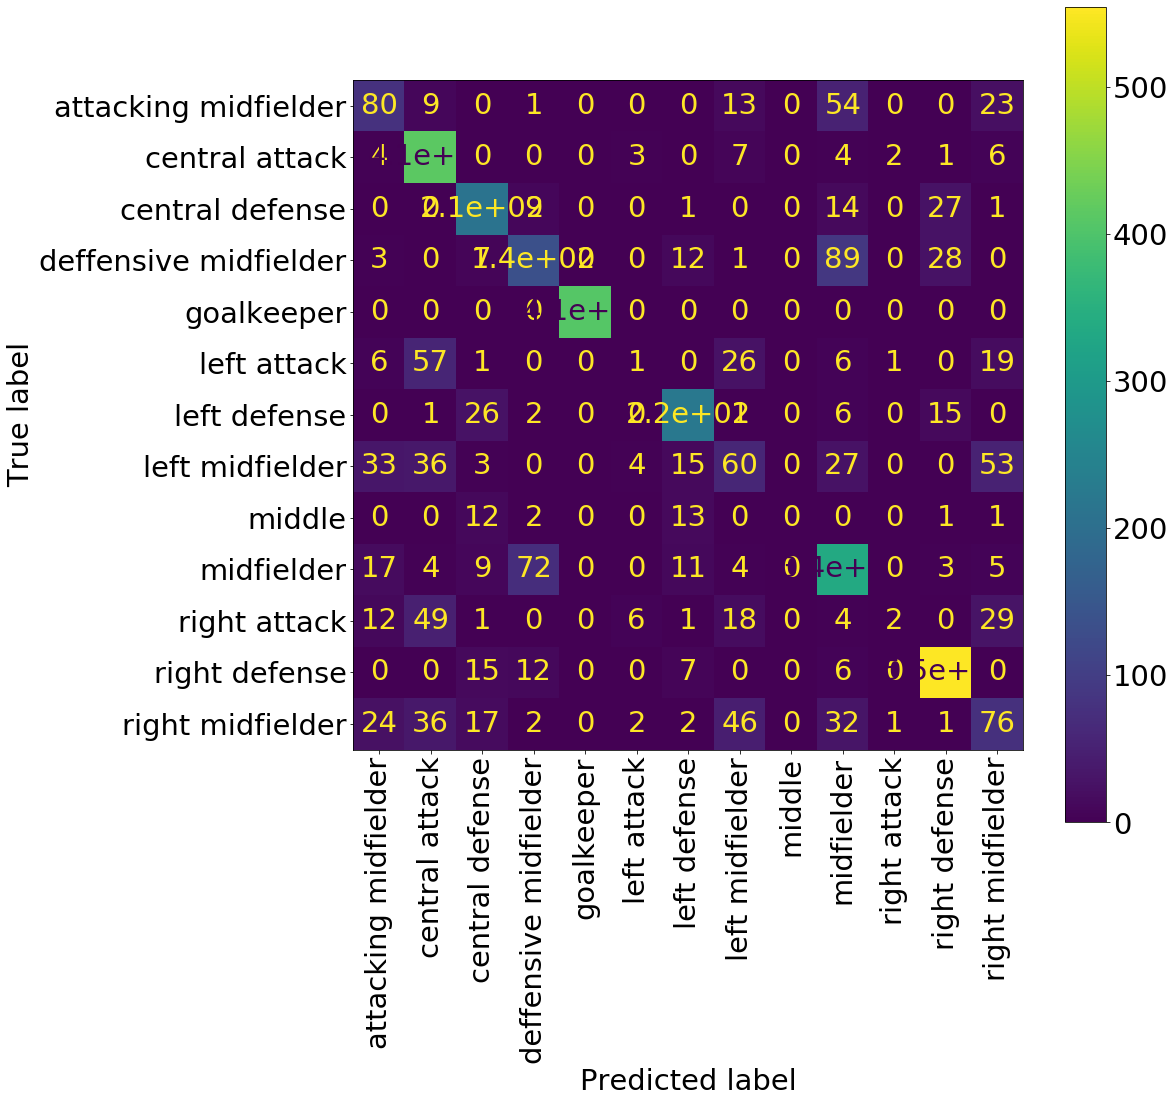

In [34]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=RandomForestClassifier(random_state=42), random_state=42)

clf.fit(X_train, y_train)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Gradient tree boosting

attacking midfielder
precision: 0.4777777777777778
recall: 0.5088757396449705
f1-score: 0.49283667621776506
support: 169


central attack
precision: 0.927437641723356
recall: 0.718804920913884
f1-score: 0.80990099009901
support: 569


central defense
precision: 0.7824427480916031
recall: 0.6765676567656765
f1-score: 0.7256637168141593
support: 303


deffensive midfielder
precision: 0.5709090909090909
recall: 0.5924528301886792
f1-score: 0.5814814814814815
support: 265


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.05982905982905983
recall: 0.25
f1-score: 0.09655172413793103
support: 28


left defense
precision: 0.8051470588235294
recall: 0.8171641791044776
f1-score: 0.8111111111111112
support: 268


left midfielder
precision: 0.30735930735930733
recall: 0.355
f1-score: 0.3294663573085847
support: 200


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 6


midfielder
precision: 0.720173535791757
recall: 0.6136783733826248
f1-score: 0

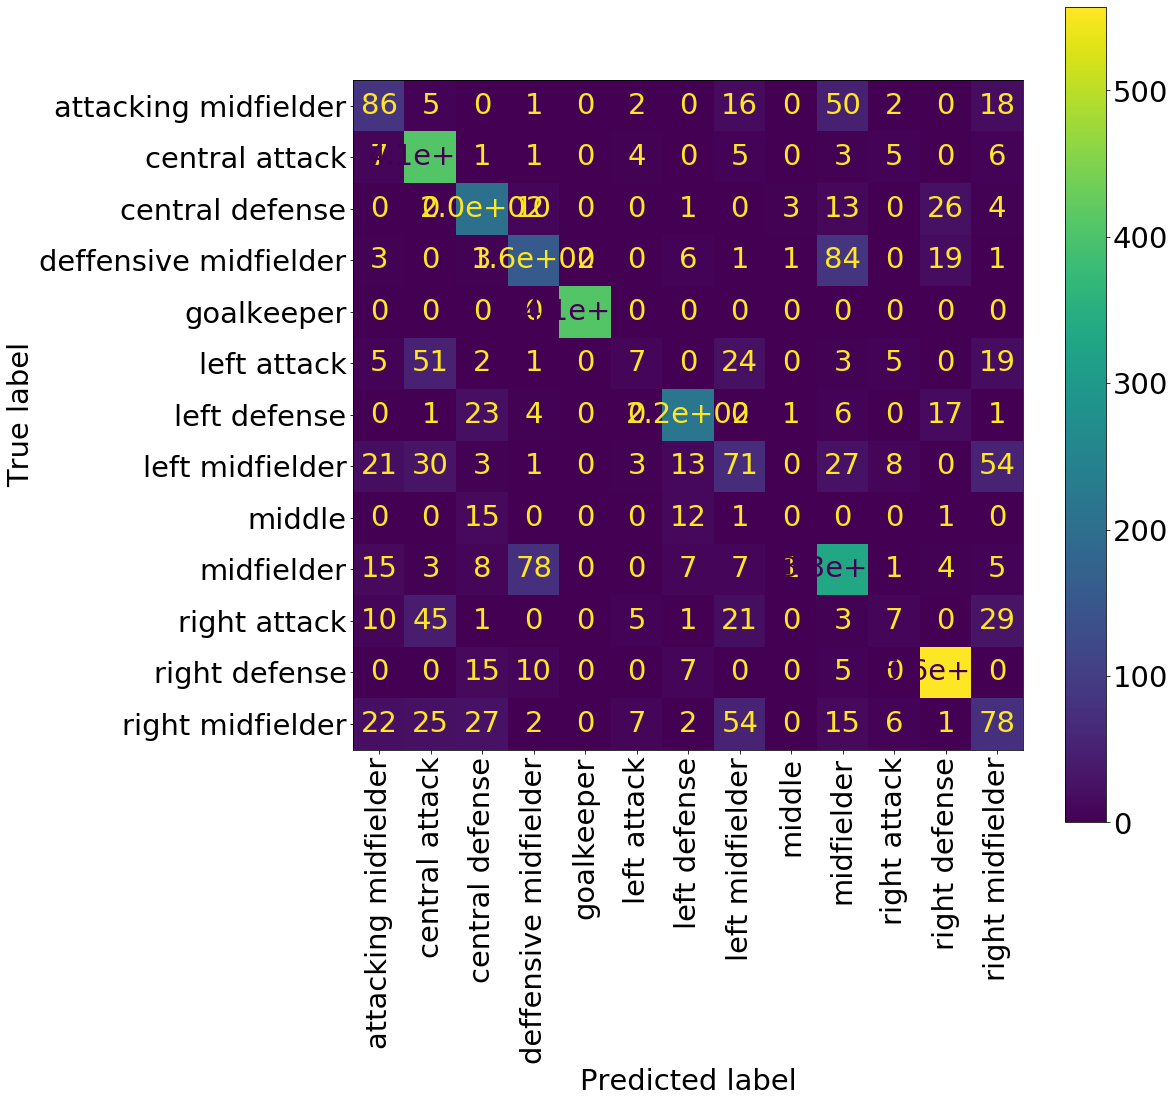

In [35]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100)

clf.fit(X_train, y_train)

custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

## Voting classifier

Considering the speed and the achieved results (there are models which are faster with a betetr results), we ommited voting classifiers for Position 13.

## Stacked generalization

Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


attacking midfielder
precision: 0.5277777777777778
recall: 0.49222797927461137
f1-score: 0.5093833780160859
support: 193


central attack
precision: 0.9365079365079365
recall: 0.7084048027444254
f1-score: 0.806640625
support: 583


central defense
precision: 0.8053435114503816
recall: 0.6918032786885245
f1-score: 0.7442680776014109
support: 305


deffensive midfielder
precision: 0.5490909090909091
recall: 0.5852713178294574
f1-score: 0.5666041275797374
support: 258


goalkeeper
precision: 1.0
recall: 1.0
f1-score: 1.0
support: 407


left attack
precision: 0.008547008547008548
recall: 0.3333333333333333
f1-score: 0.016666666666666666
support: 3


left defense
precision: 0.8014705882352942
recall: 0.8320610687022901
f1-score: 0.8164794007490637
support: 262


left midfielder
precision: 0.38961038961038963
recall: 0.3879310344827586
f1-score: 0.38876889848812096
support: 232


middle
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


midfielder
precision: 0.7114967462039046
recall: 0.6

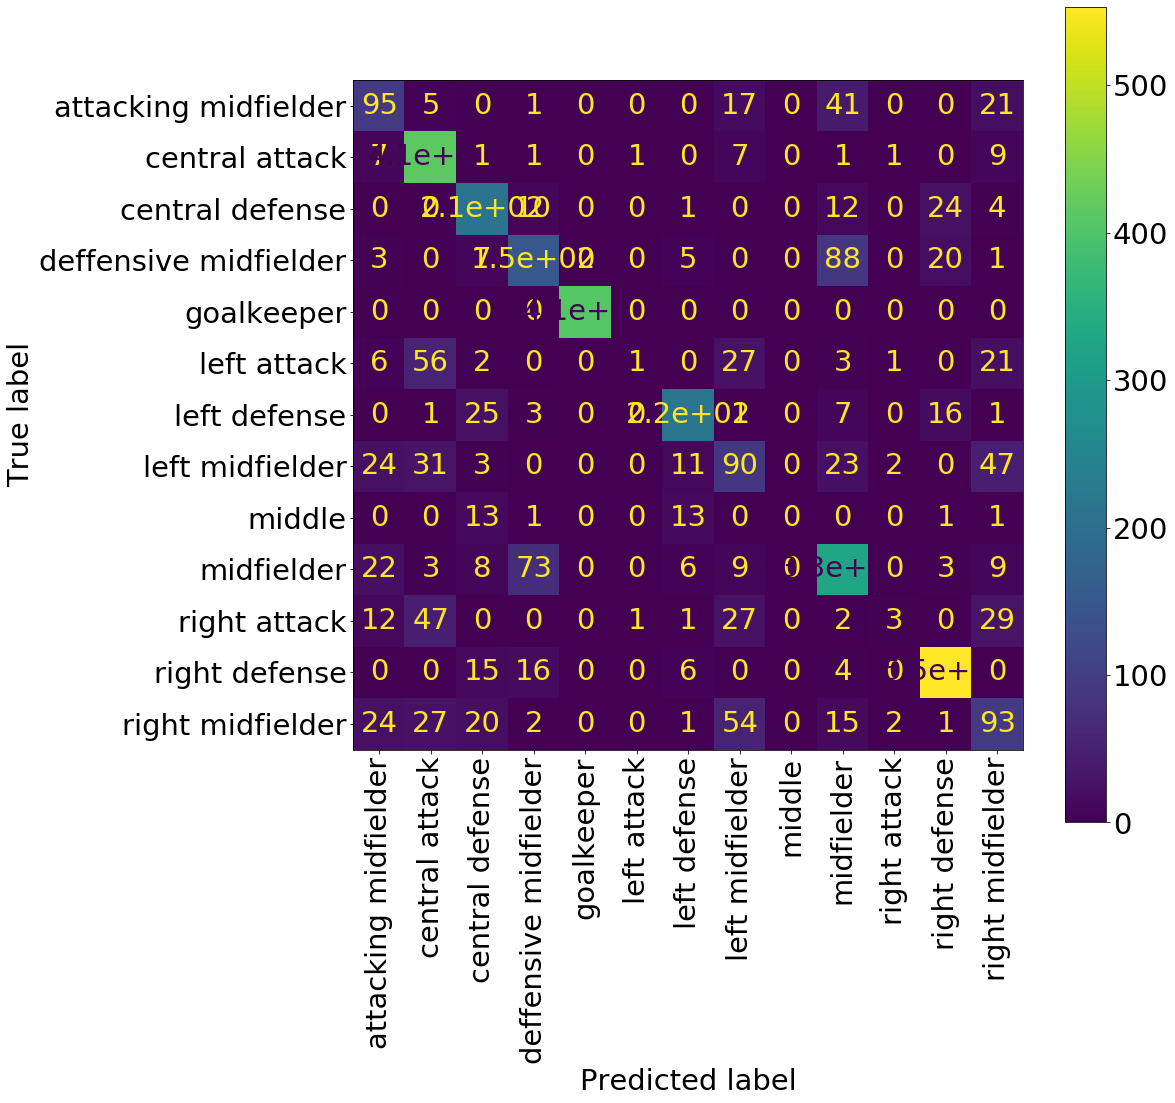

In [36]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_ada = AdaBoostClassifier(n_estimators=100, base_estimator=RandomForestClassifier(random_state=42), random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=100)

estimators = [
    ('rf', clf_rf),
    ('gb', clf_gb),
    ('ada', clf_ada)
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=10000, n_jobs=-1))

clf.fit(X_train, y_train)
custom_classification_report(clf, labels, X_test, y_test, figsize=(15, 15))

### Conclusion

In comparison with our baseline model which is RandomForestClassifier we achieved better results most of the time.

__F1 - RandomForestClassifier__

micro: 0.8884297520661157

macro: 0.8997039115150824


For example with GradientTreeBoosting we have achieve.

__F1 - GradientTreeBoosting__

micro: 0.8922865013774105

macro: 0.903169060498809

Considering speed and the results, the AdaBoost and GradientTreeBosting algorithms were the best.